In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import dataframe_image as dfi

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE

In [2]:
model = pd.read_csv("IL_Loan_Outcome.csv", low_memory = False)

In [3]:
# TOTAL ROWS AND COLUMNS
print('Total columns:',len(model.columns))
print('Total rows:',len(model))

Total columns: 180
Total rows: 199899


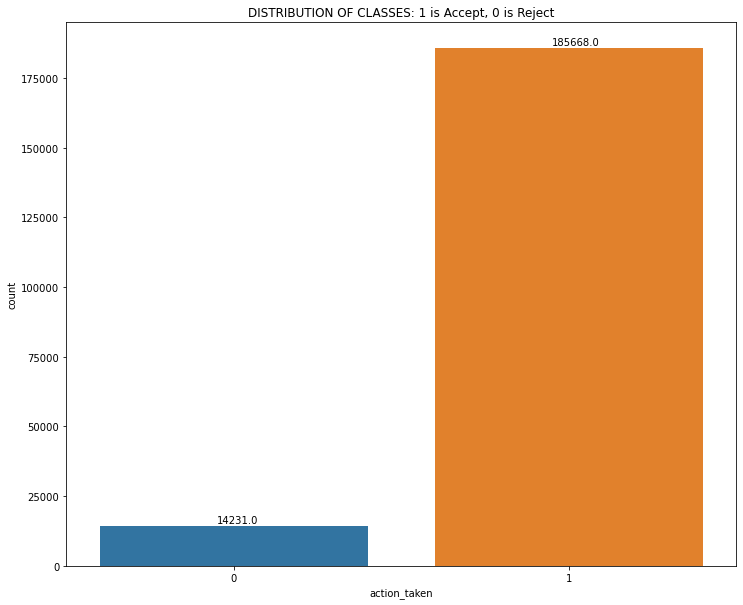

In [4]:
# DISTRIBUTION OF CLASSES
plt.figure(figsize=(12,10))
plt.title("DISTRIBUTION OF CLASSES: 1 is Accept, 0 is Reject")
ax = sns.countplot(x = model["action_taken"])
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+1000.52))

In [9]:
##### ML Classification Models ####

In [10]:
### RANDOM FOREST ###
# OVER SAMPLING THE MINORITY (REJECT)
X = model.drop("action_taken",axis = 1)
y = model["action_taken"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

X = pd.concat([X_train, y_train], axis=1)
reject = X[X["action_taken"]==0]
accept = X[X["action_taken"]==1]

reject_o = resample(reject,replace=True,n_samples=len(accept),random_state=0)
new = pd.concat([accept, reject_o])

# RETEST
y_train = new["action_taken"]
X_train = new.drop("action_taken", axis=1)
rfco = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(X_train, y_train)
predo = rfco.predict(X_test)
print(confusion_matrix(y_test,predo))
print(classification_report(y_test,predo))

[[ 3339   237]
 [  779 45620]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      3576
           1       0.99      0.98      0.99     46399

    accuracy                           0.98     49975
   macro avg       0.90      0.96      0.93     49975
weighted avg       0.98      0.98      0.98     49975



In [11]:
### RANDOM FOREST ###
# UNDER SAMPLING THE MAJORITY (ACCEPT)
X = model.drop("action_taken",axis = 1)
y = model["action_taken"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

X = pd.concat([X_train, y_train], axis=1)
reject = X[X["action_taken"]==0]
accept = X[X["action_taken"]==1]

accept_u = resample(accept, replace = False, n_samples = len(reject), random_state = 0) 
new = pd.concat([accept_u, reject])

# RETEST
y_train = new["action_taken"]
X_train = new.drop("action_taken", axis=1)
rfcu = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(X_train, y_train)
predu = rfcu.predict(X_test)
print(confusion_matrix(y_test,predu))
print(classification_report(y_test,predu))

[[ 3562    14]
 [ 2858 43541]]
              precision    recall  f1-score   support

           0       0.55      1.00      0.71      3576
           1       1.00      0.94      0.97     46399

    accuracy                           0.94     49975
   macro avg       0.78      0.97      0.84     49975
weighted avg       0.97      0.94      0.95     49975



In [12]:
### RANDOM FOREST ###
# SMOTE
X = model.drop("action_taken",axis = 1)
y = model["action_taken"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
smote = RandomForestClassifier(n_estimators = 100, random_state = 0).fit(X_train, y_train)

pred = smote.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[ 3280   296]
 [  831 45568]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.85      3576
           1       0.99      0.98      0.99     46399

    accuracy                           0.98     49975
   macro avg       0.90      0.95      0.92     49975
weighted avg       0.98      0.98      0.98     49975



In [13]:
#RANDOM FOREST 
X = model.drop("action_taken",axis = 1)
y = model["action_taken"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)
# RANDOM FOREST 1: RF1
rf = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf.fit(X_train,y_train)
prf = rf.predict(X_test)
print(confusion_matrix(y_test,prf))
print(classification_report(y_test,prf))

[[ 3232   344]
 [  646 45753]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3576
           1       0.99      0.99      0.99     46399

    accuracy                           0.98     49975
   macro avg       0.91      0.94      0.93     49975
weighted avg       0.98      0.98      0.98     49975

